Topic: Challenge 3 
Subject: Pandas Challenges 
Date: 01/17/2018 
Name: Matias Beeck

In [1]:
import csv
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

from datetime import datetime
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading in Data From Repo
df = pd.read_csv('https://raw.githubusercontent.com/thisismetis/nyc18_ds14/master/challenges/challenges_data/2013_movies.csv?token=AMFwZV_LPSJQ2IL_DX5M6Em9fcXPHlm4ks5aaQNCwA%3D%3D')
df.head()



,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.00,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.00,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.00,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.00,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.00,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


### Challenge 1

In [3]:
# Cleaning up release date into just the date
df.ReleaseDate[0]

'2013-11-22 00:00:00'

In [4]:
from datetime import datetime
datetime.strptime(df.ReleaseDate[0], '%Y-%m-%d %H:%M:%S')

datetime.datetime(2013, 11, 22, 0, 0)

In [5]:
df.ReleaseDate = pd.to_datetime(df.ReleaseDate, format='%Y-%m-%d %H:%M:%S', errors='ignore')

In [6]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.00,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.00,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.00,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.00,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.00,291045518,Zack Snyder,PG-13,143,2013-06-14


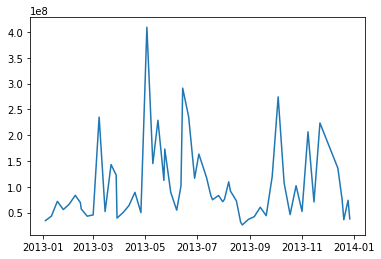

In [7]:
# Grouping by date on total gross
grouped_date = df.groupby(['ReleaseDate'])[['DomesticTotalGross']].mean()
grouped_date = grouped_date.reset_index()
plt.plot(grouped_date.ReleaseDate, grouped_date.DomesticTotalGross)

### Challenge 2

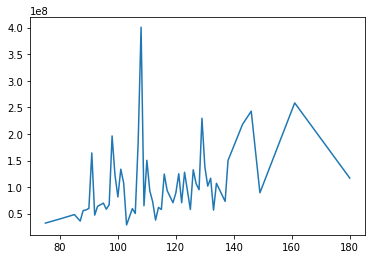

In [8]:
# Grouping by runtime on total gross
grouped_runtime = df.groupby(['Runtime'])[['DomesticTotalGross']].mean()
grouped_runtime = grouped_runtime.reset_index()
plt.plot(grouped_runtime.Runtime, grouped_runtime.DomesticTotalGross)

### Challenge 3

Average runtime and total gross for each Rating category

In [9]:
# Grouping by rating on total gross and runtime
grouped_rating = df.groupby(['Rating'])[['DomesticTotalGross', 'Runtime']].mean()
grouped_rating = grouped_rating.reset_index()
grouped_rating


,Rating,DomesticTotalGross,Runtime
0,G,268492764.00,107.00
1,PG,131135716.07,99.93
2,PG-13,111449769.02,117.51
3,R,69892429.00,110.73


In [10]:
# Making lists subdataframes of each rating
g_rated = df[df.Rating == 'G'] 
pg_rated = df[df.Rating == 'PG'] 
pg13_rated = df[df.Rating == 'PG-13'] 
r_rated = df[df.Rating == 'R'] 

In [11]:
# Grouping by release date on total gross for each rating 
# G
g_grouped_date = g_rated.groupby(['ReleaseDate'])[['DomesticTotalGross']].mean()
g_grouped_date = g_grouped_date.reset_index()

# PG
pg_grouped_date = pg_rated.groupby(['ReleaseDate'])[['DomesticTotalGross']].mean()
pg_grouped_date = pg_grouped_date.reset_index()

# PG-13
pg13_grouped_date = pg13_rated.groupby(['ReleaseDate'])[['DomesticTotalGross']].mean()
pg13_grouped_date = pg13_grouped_date.reset_index()

# R
r_grouped_date = r_rated.groupby(['ReleaseDate'])[['DomesticTotalGross']].mean()
r_grouped_date = r_grouped_date.reset_index()



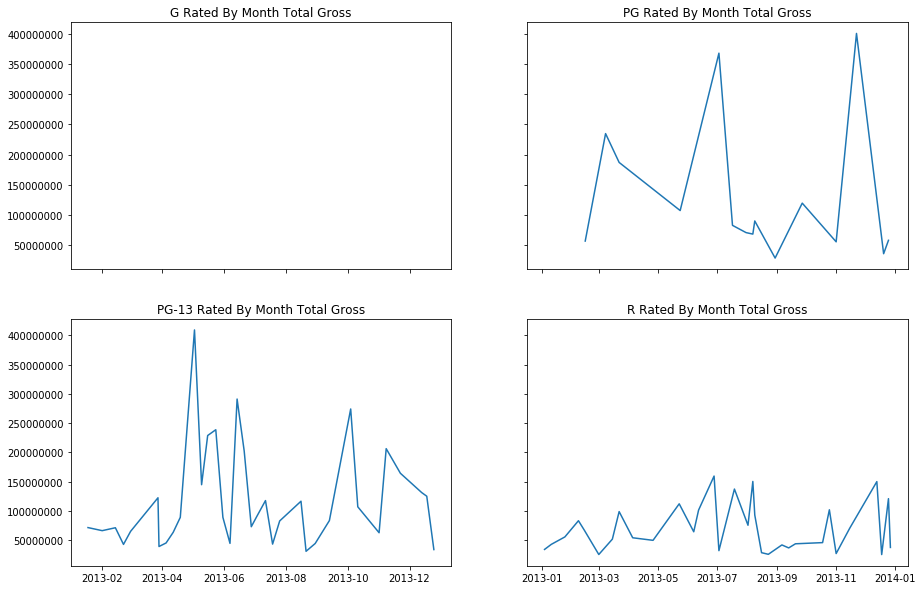

In [12]:
# Plotting Ratings by monthly gross 
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15,10))
ax1.plot(g_grouped_date.ReleaseDate, g_grouped_date.DomesticTotalGross)
ax1.set_title('G Rated By Month Total Gross')

ax2.plot(pg_grouped_date.ReleaseDate, pg_grouped_date.DomesticTotalGross)
ax2.set_title('PG Rated By Month Total Gross')
ax2.ticklabel_format(style='plain', axis='y')

ax3.plot(pg13_grouped_date.ReleaseDate, pg13_grouped_date.DomesticTotalGross)
ax3.set_title('PG-13 Rated By Month Total Gross')

ax4.plot(r_grouped_date.ReleaseDate, r_grouped_date.DomesticTotalGross)
ax4.set_title('R Rated By Month Total Gross')
ax4.ticklabel_format(style='plain', axis='y')



### Challenge 5

In [13]:
# Top Directors by Avg Gross
grouped_director = df.groupby(['Director'])[['DomesticTotalGross']].mean()
grouped_director = grouped_director.reset_index()
grouped_director.columns = ['Director', 'Avg Total Gross']
grouped_director.sort_values(by='Avg Total Gross', ascending = False).head()

,Director,Avg Total Gross
27,Francis Lawrence,424668047
81,Shane Black,409013994
15,Chris BuckJennifer Lee,400738009
71,Pierre CoffinChris Renaud,368061265
92,Zack Snyder,291045518


__Francis Lawrence__ has the highest _average total gross_

### Challenge 6

In [14]:
# Setting up Release date variable to just be month for plots
extract_month = lambda x: x.month

df['Month'] = df['ReleaseDate'].apply(extract_month)


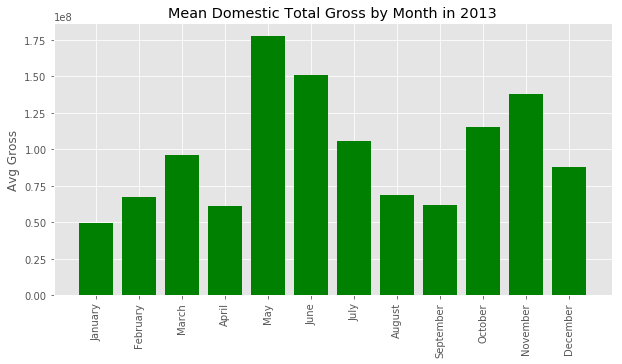

In [15]:
# plotting avg total gross over month
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

grouped_months = df.groupby(['Month'])[['DomesticTotalGross']].mean()
grouped_months = grouped_months.reset_index()
grouped_months.drop(['Month'], axis=1, inplace=True)
grouped_months.columns = ['Avg Total Gross']

month_xticks = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
gross = grouped_months['Avg Total Gross']

x_pos = range(len(month_xticks))

plt.figure(figsize=(10,5))

plt.bar(x_pos, gross, color='green')
plt.ylabel("Avg Gross")
plt.title("Mean Domestic Total Gross by Month in 2013")

plt.xticks(x_pos, month_xticks, rotation=90)

plt.show()

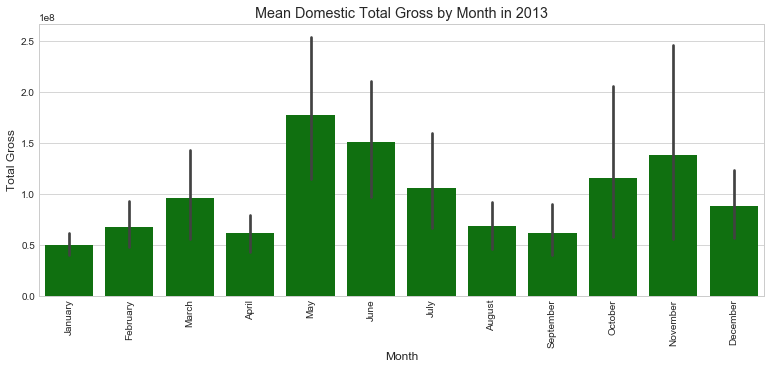

In [16]:
# Plotting with confidence interval
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(13,5))
ax = sns.barplot(x=df.Month, y=df.DomesticTotalGross, data=df, color='green')
ax.set_title('Mean Domestic Total Gross by Month in 2013')
ax.set_ylabel("Total Gross")
ax.set_xlabel("Month")
plt.xticks(x_pos, month_xticks, rotation=90);
